<center>
    <h1> CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - PHẦN 04 </h1>
    
</center>
    
---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='400px'>

# B| Hồi quy (Regression)

## I) THUẬT TOÁN HỒI QUY TUYẾN TÍNH (Linear Regression)
---
<img src='pic/linear.png' width='400px'>




## VÍ DỤ :
## DỰ ĐOÁN GIÁ NHÀ
---
Tập dữ liệu bao gồm 545 bản ghi về các thông số của căn nhà và giá bán. Các thông số bao gồm:
1. area: diện tích căn nhà
2. bedrooms: số phòng ngủ (interger)
3. bathrooms: số phòng tắm
4. mainroad: Có gần đường chính hay không (Yes|No)
5. gestroom: Có phòng khách hay không (Yes | No)
6. basement: Có tầng hầm hay không (Yes | No)
7. parking: số chỗ đỗ xe oto
8. furnishingstatus: Tình trạng nội thất của căn nhà
    * furnished: đầy đủ nội thất 
    * unfurnished: không có nội thất
    * semi-furnished: được trang bị một phần nội thất
9. price: Giá bán ($)

<img src='pic/pricehouse.png' width='400px'>

## A. Chuẩn bị dữ liệu
---
### A.1 Đọc và quan sát dữ liệu

- nếu dùng 1 biến để dự báo 1 biến gọi là hồi quy tuyến tính đơn giản
- 

In [1]:
#Gọi thư viện sử dụng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#----------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dữ liệu từ datasets:
data = pd.read_csv('Data/Data_Housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   mainroad          545 non-null    object
 4   guestroom         545 non-null    object
 5   basement          545 non-null    object
 6   parking           545 non-null    int64 
 7   furnishingstatus  545 non-null    object
 8   price             545 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 38.4+ KB


In [3]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
data.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,yes,no,no,2,furnished,13300000
1,8960,4,4,yes,no,no,3,furnished,12250000
2,9960,3,2,yes,no,yes,2,semi-furnished,12250000
3,7500,4,2,yes,no,yes,3,furnished,12215000
4,7420,4,1,yes,yes,yes,2,furnished,11410000


In [4]:
#Hiển thị 5 dòng dữ liệu cuối cùng:
data.tail()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
540,3000,2,1,yes,no,yes,2,unfurnished,1820000
541,2400,3,1,no,no,no,0,semi-furnished,1767150
542,3620,2,1,yes,no,no,0,unfurnished,1750000
543,2910,3,1,no,no,no,0,furnished,1750000
544,3850,3,1,yes,no,no,0,unfurnished,1750000


In [5]:
#Kiểm tra dữ liệu missing:
data.isnull().sum()

area                0
bedrooms            0
bathrooms           0
mainroad            0
guestroom           0
basement            0
parking             0
furnishingstatus    0
price               0
dtype: int64

In [6]:
#Kiểm tra dữ liệu trùng lặp:
data.duplicated().sum()

0

In [7]:
#Các đặc trưng thống kê của các thuộc tính số:
data.describe()

,area,bedrooms,bathrooms,parking,price
count,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,3.000000,1.330000e+07


**NHẬN XÉT:**
* Diện tích các căn nhà trong khoảng từ 1650 (m2) đến 16200 (m2), trung bình là 5150 (m2)
* Số phòng của của các căn nhà nhỏ nhất là 1 phòng, nhiều nhất là 6 phòng ngủ, trung bình ~3 phòng ngủ mỗi căn nhà
* Số phòng tắm nhỏ nhất là 1 phòng, nhiều nhất là 4 phòng.
* Chỗ đỗ xe, thấp nhất là 0 có chỗ đỗ nào, nhiều nhất là 3 bãi đỗ xe.
* Giá bán trong khoảng từ 1.75 triệu USD đến 13.3 triệu USD, trung bình mỗi căn bán với giá 4.77 triệu USD

In [8]:
#Quan sát các đặc trưng thống kê của biến có kiểu Object:
data.describe(include='O')

,mainroad,guestroom,basement,furnishingstatus
count,545,545,545,545
unique,2,2,2,3
top,yes,no,no,semi-furnished
freq,468,448,354,227


In [9]:
#Thống kê tình trạng nội thất của các căn nhà:
data['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

**NHẬN XÉT:**
* Các căn nhà chủ yếu là gần đường chính với 468/545 (~ 86%) căn - Yes
* Các căn nhà hầu hết là không có phòng khách với 448/545 (~82%) căn - No
* Đại đa số các căn nhà không có tầm hầm 354/545 (65%) căn - No
* Các căn nhà đã được trang bị đầy đủ nội thất (140/545 ~ 26%), trang bị một phần (227/545 ~ 42%), không có nội thất (178/545 ~ 33%)

### A.2. Chuẩn hóa dữ liệu
---
Biến đổi dữ liệu các thuộc tính Object về dạng số:
Có 4 thuộc tính có kiểu dữ liệu là Object:
1. mainroad: yes - no
2. guestroom: yes - no
3. basement: yes - no
4. furnishingstatus: furnished  - semi-furnished - unfurnished

In [10]:
#Tạo bản sao dữ liệu:
data_ml = data.copy()
data_ml

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,yes,no,no,2,furnished,13300000
1,8960,4,4,yes,no,no,3,furnished,12250000
2,9960,3,2,yes,no,yes,2,semi-furnished,12250000
3,7500,4,2,yes,no,yes,3,furnished,12215000
4,7420,4,1,yes,yes,yes,2,furnished,11410000
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,yes,no,yes,2,unfurnished,1820000
541,2400,3,1,no,no,no,0,semi-furnished,1767150
542,3620,2,1,yes,no,no,0,unfurnished,1750000
543,2910,3,1,no,no,no,0,furnished,1750000


In [11]:
#Thực hiện LabelEncoder các thuộc tính Object:
data_ml['mainroad']=data_ml['mainroad'].map({'no':0,
                                             'yes':1}).astype(int)

data_ml['guestroom']=data_ml['guestroom'].map({'no':0,
                                               'yes':1}).astype(int)

data_ml['basement']=data_ml['basement'].map({'no':0,
                                             'yes':1}).astype(int)

data_ml['furnishingstatus']=data_ml['furnishingstatus'].map({'furnished':0,
                                                             'semi-furnished':1,
                                                             'unfurnished':2}).astype(int)
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   mainroad          545 non-null    int32
 4   guestroom         545 non-null    int32
 5   basement          545 non-null    int32
 6   parking           545 non-null    int64
 7   furnishingstatus  545 non-null    int32
 8   price             545 non-null    int64
dtypes: int32(4), int64(5)
memory usage: 29.9 KB


In [12]:
#Dữ liệu mới:
data_ml

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,1,0,0,2,0,13300000
1,8960,4,4,1,0,0,3,0,12250000
2,9960,3,2,1,0,1,2,1,12250000
3,7500,4,2,1,0,1,3,0,12215000
4,7420,4,1,1,1,1,2,0,11410000
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,2,2,1820000
541,2400,3,1,0,0,0,0,1,1767150
542,3620,2,1,1,0,0,0,2,1750000
543,2910,3,1,0,0,0,0,0,1750000


In [13]:
#Lưu dữ liệu đã xử lý:
data_ml.to_csv('Data/Data_housing_ok.csv',index=None)

## B. Dự đoán giá nhà với mô hình hồi quy tuyến tính
---
1. Simple Linear Regression
2. Multiple Linear Regression

## 1. Hồi quy tuyến tính đơn giản ( 1 biến độc lập)

<img src='pic/linear.png' width='400px'>

**Hàm số:**
$$y=w_0+w_1 x$$


- $y$: biến phụ thuộc

- $x$: biến độc lập

- $w_0,w_1$: tham số của mô hình


### Xác định giá trị của tham số mô hình

- Xác định sai số ( hàm tổn thất) của mô hình.

- Chọn tham số để sai số nhỏ nhất.

**Sử dụng 1 tham số diện tích (area) để dự đoán giá nhà (price):**

xây dựng phương trình: $$y_{price} = w_0 + w_1 * x_{area}$$

### 1.1) Đọc tập dữ liệu đã xử lý
---

In [14]:
#Gọi các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [15]:
#Đọc dữ liệu đã xử lý:
df_house = pd.read_csv('Data/Data_housing_ok.csv')
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   mainroad          545 non-null    int64
 4   guestroom         545 non-null    int64
 5   basement          545 non-null    int64
 6   parking           545 non-null    int64
 7   furnishingstatus  545 non-null    int64
 8   price             545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB


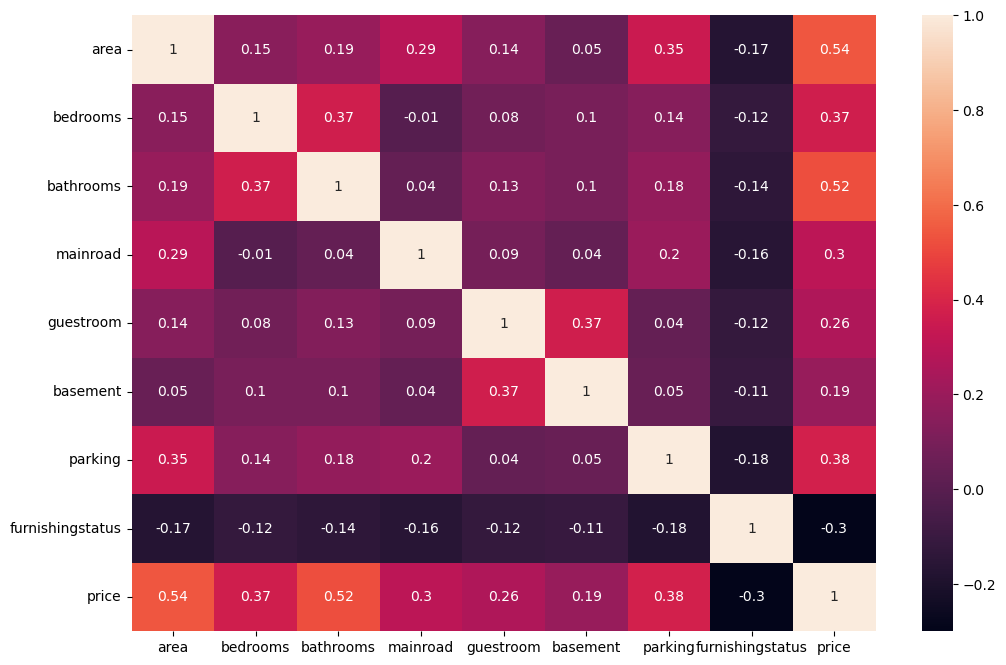

In [16]:
#Xác định mức độ ảnh hưởng của các thuộc tính tới giá bán một căn nhà:
#Xác định hệ số tương quan trong tập dữ liệu
import seaborn as sns
correlation_matrix = df_house.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


<img src='pic/Covariance.jpg' width = '700px'>

**Mức độ ảnh hưởng của 8 thuộc tính tới giá của một căn nhà là khác nhau:**
1. area: Diện tích tương quan thuận đến giá bán (0.54)
2. bedrooms: Tương quan thuận với giá bán (0.37)
3. bathrooms: Tương quan thuận với giá bán (0.52)
4. mainroad: Tương quan thuận, các căn nhà gần đường chính giá cao hơn (0.3)
5. gestroom: Tương quan thuận (0.26)
6. Basement: Tương quan thuận (0.19)
7. parking: Tương quan thuận (0.38)
8. furnishingstatus: Tương quan nghịch, các căn nhà ko có nội thất giá càng thấp (-0.3)


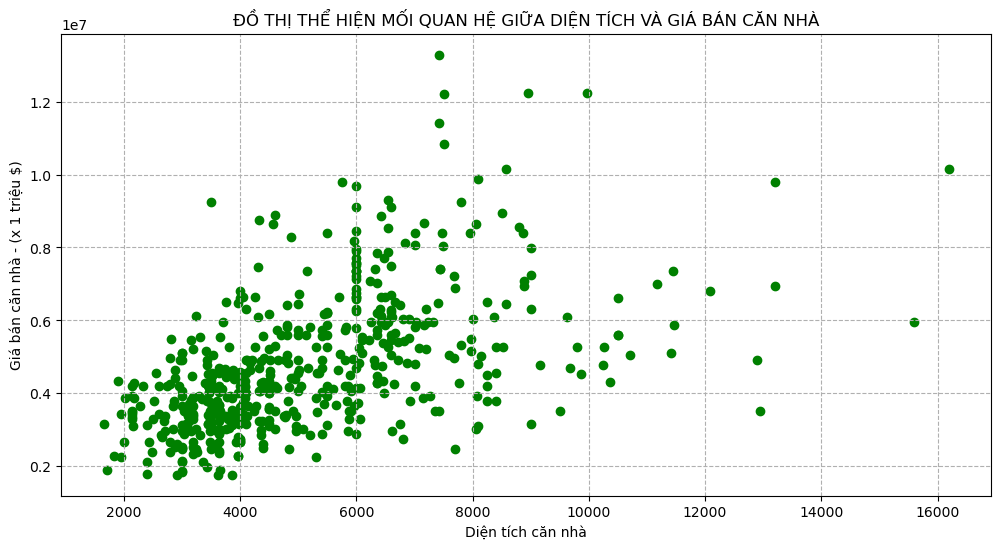

In [17]:
#Trực quan hóa dữ liệu diện tích với giá bán nhà (price):
plt.figure(figsize=(12,6))
plt.scatter(df_house['area'],
            df_house['price'],
            marker='o', 
            color='green')
plt.title('ĐỒ THỊ THỂ HIỆN MỐI QUAN HỆ GIỮA DIỆN TÍCH VÀ GIÁ BÁN CĂN NHÀ')
plt.xlabel('Diện tích căn nhà')
plt.ylabel('Giá bán căn nhà - (x 1 triệu $)')
plt.grid(ls='--')
plt.show()

In [18]:
#XÂY DỰNG MÔ HÌNH HỒI QUY TUYẾN TÍNH DIỆN TÍCH ĐỂ DỰ BÁO GIÁ NHÀ
#Tách Dữ liệu lấy tham số diện tích và giá nhà
df_house[['area','price']].head(10)

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
5,7500,10850000
6,8580,10150000
7,16200,10150000
8,8100,9870000
9,5750,9800000


### 1.2 phân tách biến độc lập và biến phụ thuộc
---

In [19]:
#Tách các biến độc lập để xây dựng mô hình hồi quy
X_area = df_house['area'].values

#Tách biến phụ thuộc:
y_price = df_house['price'].values

#------------Biến đổi X về dạng ma trận-------
X_area = X_area.reshape(-1,1)


#Hiển thị 10 bộ tham số đầu tiên:
print('Diện tích:', X_area[:5,0])
print('Giá bán  :', y_price[:5])

Diện tích: [7420 8960 9960 7500 7420]
Giá bán  : [13300000 12250000 12250000 12215000 11410000]


### 1.3 Phân tách tập dữ liệu thành tập Train - Test
---

Phân tách làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (80% - 20%)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_area, 
                                                    y_price, 
                                                    test_size=0.2,
                                                    shuffle=True)

print("1. Kích thước tập Training:", len(y_train))
print("2. Kích thước tập Test    :" ,len(y_test))

1. Kích thước tập Training: 436
2. Kích thước tập Test    : 109


In [21]:
X_train[:10]

array([[8400],
       [6540],
       [5500],
       [5900],
       [4000],
       [5750],
       [4000],
       [4750],
       [3640],
       [2700]], dtype=int64)

In [22]:
y_train[:10]

array([4550000, 8540000, 5600000, 3500000, 2660000, 9800000, 6615000,
       3360000, 3234000, 2940000], dtype=int64)

### 1.4. Khai báo sử dụng mô hình hồi quy tuyến tính với tham số mặc định
---

In [23]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression

#khai báo sử dụng model với các tham số mặc định
model_linear = LinearRegression()

#Các tham số của mô hình:
model_linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

**Các tham số của mô hình hồi quy tuyến tính xem chi tiết tại:**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Tham số quan trọng:
1. fit_intercept ( kiểu dữ liệu bool, default=True): Có tính toán trọng số w0 (bias) trong phương trình hay không?


### 1.5 Huấn luyện mô hình
---

In [24]:
#Huấn luyện model:
model_linear.fit(X_train, y_train)

LinearRegression()

In [25]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w1 = model_linear.coef_
print('Hệ số: w1= ', w1)

Hệ số: w1=  [453.31492834]


In [26]:
#Hệ số w0 (bias):
w0 = model_linear.intercept_
print('Hệ số: w0= ', w0)

Hệ số: w0=  2482749.1975787


### Phương trình đường thẳng xác định được:
$$\overline{y} = f(x) = w0 + w1*x_{area} = 2530403.42 + 432.99*x_{area}$$

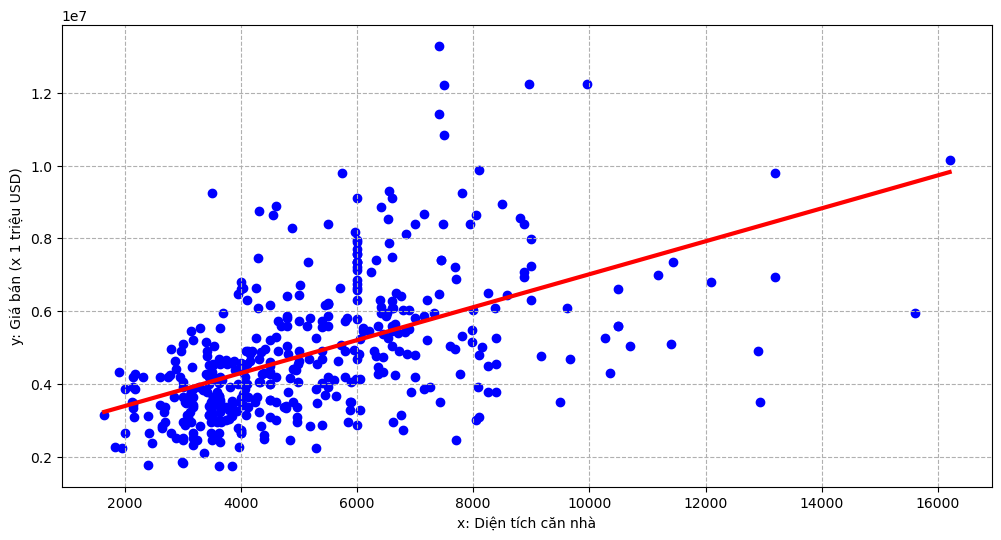

In [27]:
#Trực quan hóa đường hồi quy tuyến tính
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)

plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,model_linear.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.xlabel("x: Diện tích căn nhà")
plt.grid(ls='--')
plt.show()

### 1.6 Dự đoán với mô hình hồi quy tuyến tính xác định được
---

In [28]:
#Giả sử có một căn nhà mới có diện tích 14000 m2
x_area = 14000
print('Diện tích căn nhà: ', x_area)

Diện tích căn nhà:  14000


In [29]:
#---Theo phương trình đường thẳng:
y_price = w0 +w1*x_area
print('--> Giá bán căn nhà tương ứng là: ', np.round(y_price,0))

--> Giá bán căn nhà tương ứng là:  [8829158.]


In [30]:
#---Theo mô hình hồi quy:
y_price = model_linear.predict(np.array([x_area]).reshape(-1,1))
print('--> Giá bán căn nhà tương ứng là: ', np.round(y_price,0))

--> Giá bán căn nhà tương ứng là:  [8829158.]


### 1.7 Đánh giá độ chính xác của mô hình trên tập test
---

In [31]:
#Dự đoán giá bán trên tập Test:
y_pred =model_linear.predict(X_test)

#Làm tròn và chuyển về số nguyên
y_pred = np.round(y_pred,0).astype(int)

print('Kết quả trên tập Test:',y_pred.ravel())

Kết quả trên tập Test: [3759737 4314142 3638702 4912517 5317781 5694485 3801896 5202639 4132816
 5202639 3366713 4060285 4196280 4228012 4314142 3951490 4582504 4296009
 3924291 5125575 3514041 5447429 5874451 5429296 4522666 4783776 6222597
 4973715 4463735 4455576 5655954 4477335 4522666 5202639 3570705 4073885
 3842694 5211705 4975981 3924291 5814614 4767456 5150508 4266090 5474628
 4289663 7677738 5393031 3801896 4169081 3777417 3951490 6952434 6344992
 3253385 4114683 5202639 3842694 4694926 4332274 5365832 3616037 5365832
 6562584 3455110 5361299 6925235 3842694 4531733 4296009 5760669 4645061
 4522666 3842694 4282409 4033086 5134642 5420230 5202639 4749324 4314142
 4316861 5365832 4205346 5474628 4182680 4136895 4330008 5184506 4051219
 3962369 6372191 5365832 4187213 3888025 3842694 4132816 3625103 4128282
 4481868 5420230 4114683 3842694 5665020 4522666 3767897 7124694 3746138
 5247970]


In [32]:
#So sánh giá bán và giá dự đoán 10 căn nhà đầu tiên trong tập test
print('Giá dự đoán :',y_pred[:5].ravel())
print('Giá bán thật:',y_test[:5].ravel())

Giá dự đoán : [3759737 4314142 3638702 4912517 5317781]
Giá bán thật: [5495000 3290000 4550000 4550000 5950000]


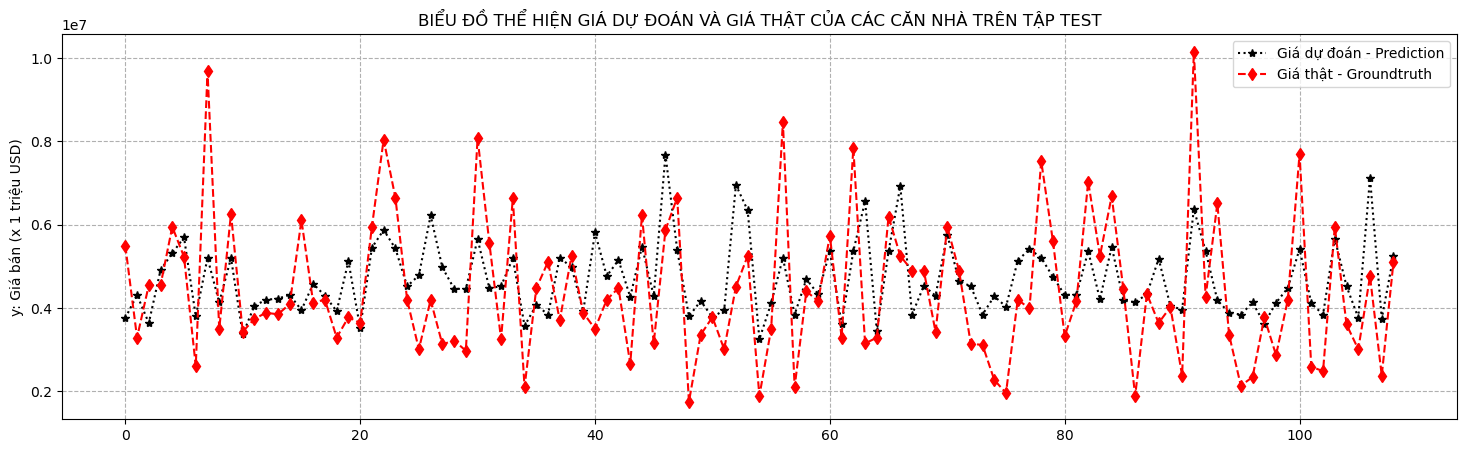

In [33]:
#Trực quan hóa kết quả giá thật và giá dự đoán
plt.figure(figsize=(18,5))
plt.plot(y_pred, marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test, marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.grid(ls='--')
plt.legend()
plt.show()

### Đánh giá độ chính xác của mô hình hồi quy
---
Các chỉ số cơ bản để đánh giá độ chính xác của mô hình hồi quy:

<img src='pic/Evaluation.jpg' width='500px'>


**1. MAE - Sai số tuyệt đối trung bình:** (MAE – Mean Absolute Error) nằm trong khoảng (0, +∞). MAE biểu thị biên độ trung bình của sai số mô hình nhưng không nói lên xu hướng lệch của giá trị dự đoán (predicted) và giá trị thực (Actual). Khi MAE = 0, các giá trị dự đoán hoàn toàn trùng khớp với các giá trị thực, khi đó mô hình được xem là “lý tưởng”!
<img src='pic/mae.jpg' width='300px'>

**2.MSE - Sai số bình phương trung bình:** nằm trong khoảng (0, +∞), MSE phản ánh mức độ dao động giữa giá trị dự đoán với giá trị thực.
<img src='pic/mse.jpg' width='300px'>

**RMSE - Sai số bình phương trung bình quân phương:** là một trong những đại lượng cơ bản và thường được sử dụng phổ biến trong đánh giá độ tin cậy của mô hình hồi quy. Người ta thường hay sử dụng RMSE biểu thị độ lớn trung bình của sai số. Đặc biệt RMSE rất nhạy với những giá trị sai số lớn. Giống như MAE, RMSE không chỉ ra độ lệch giữa giá trị dự báo và giá trị thực. Giá trị của RMSE nằm trong khoảng (0,+ ∞)

<img src = 'pic/RMSE.png' width='300px'>

**A.Model sử dụng các tham số mặc định:**

In [34]:
# Đánh giá độ chính xác trên tập TEST:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Tính các sai số của mô hình:
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = (np.sqrt(mse_test))


print("Độ chính xác của mô hình trên tập Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',round(mae_test,0))
print('2.Sai số MSE  = ',round(mse_test,0))
print('3.Sai số RMSE = ',round(rmse_test,0))


Độ chính xác của mô hình trên tập Kiểm thử:
--------------------------------------------
1.Sai số MAE  =  1152278.0
2.Sai số MSE  =  2068479683268.0
3.Sai số RMSE =  1438221.0


In [35]:
#Xác định mẫu dự đoán chênh lệch giữa giá thực và giá predict lớn nhất:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

4478361

### B.Thay đổi tham số của mô hình hồi quy:
---
Tham số mặc định:
* 'copy_X': True,
* 'fit_intercept': True,
* 'n_jobs': None,
* 'normalize': False,
* 'positive': False


In [36]:
#khai báo sử dụng model với các tham số thay đổi:
model_linear1 = LinearRegression(fit_intercept=False,
                                 copy_X=False)

#Các tham số của mô hình mới:
model_linear1.get_params()

{'copy_X': False, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

In [37]:
#Huấn luyện model:
model_linear1.fit(X_train,y_train)

LinearRegression(copy_X=False, fit_intercept=False)

In [38]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w11 = model_linear1.coef_
w11

array([855.99635276])

In [39]:
#Hệ số w0 (bias):
w01 = model_linear1.intercept_
w01

0.0

### Phương trình đường thẳng xác định được:
$$\overline{y} = f(x) = w0 + w1*x_{area} = 0 + 844.29*x_{area}$$

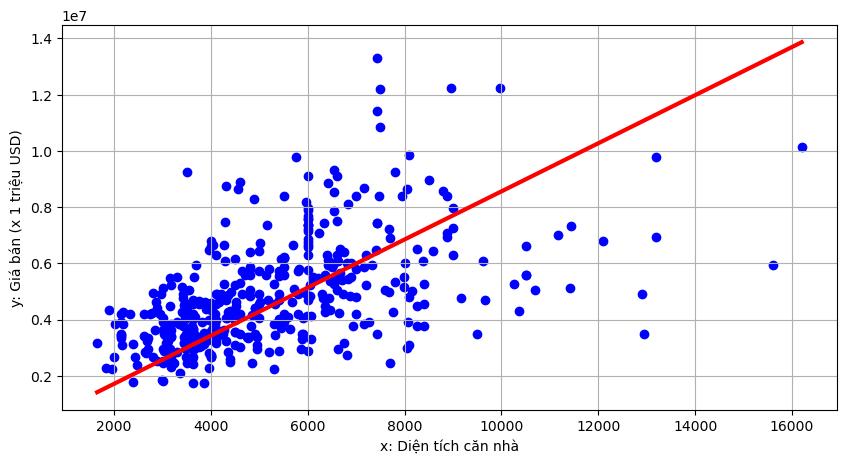

In [40]:
#Trực quan hóa đường hồi quy tuyến tính
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)

plt.figure(figsize=(10,5))
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,model_linear1.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.xlabel("x: Diện tích căn nhà")
plt.grid()
plt.show()

### Dự đoán giá bán trên tập test:
---

In [41]:
#Kiểm tra trên tập Test:
y_pred1 =model_linear1.predict(X_test)

#Làm tròn và chuyển về số nguyên
y_pred1 = np.round(y_pred1,0).astype(int)

print('Kết quả trên tập Test:',y_pred1.ravel())

Kết quả trên tập Test: [2411342 3458225 2182791 4588140 5353401 6064734 2490949 5135978 3115827
 5135978 1669193 2978867 3235666 3295586 3458225 2773428 3964975 3423985
 2722068 4990459 1947392 5598216 6404565 5563976 3851984 4345037 7061970
 4703700 3740704 3725296 5991974 3766384 3851984 5135978 2054391 3004547
 2567989 5153098 4707980 2722068 6291573 4314222 5037539 3367490 5649576
 3412001 9809718 5495497 2490949 3184306 2444726 2773428 8440124 7293089
 1455194 3081587 5135978 2567989 4177262 3492465 5444137 2139991 5444137
 7703967 1836112 5435577 8388764 2567989 3869104 3423985 6189710 4083103
 3851984 2567989 3398306 2927508 5007579 5546856 5135978 4279982 3458225
 3463361 5444137 3252786 5649576 3209986 3123531 3488185 5101738 2961747
 2793972 7344449 5444137 3218546 2653589 2567989 3115827 2157111 3107267
 3774944 5546856 3081587 2567989 6009094 3851984 2426750 8765403 2385662
 5221578]


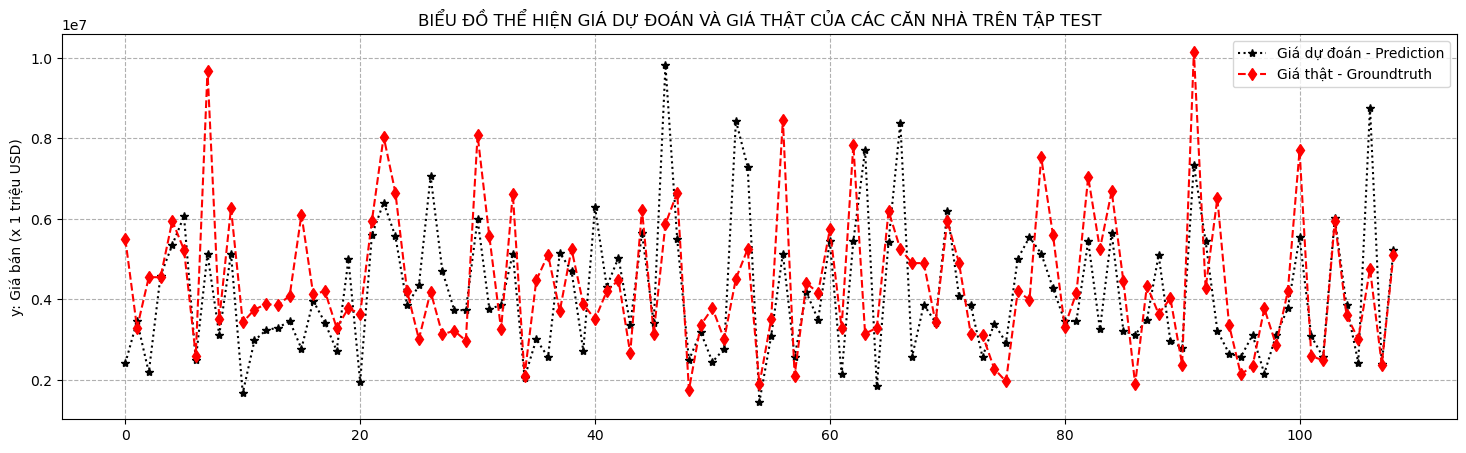

In [42]:
#Trực quan hóa kết quả
plt.figure(figsize=(18,5))
plt.plot(y_pred1, marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test, marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.grid(ls='--')
plt.legend()
plt.show()

### Đánh giá độ chính xác trên Model thay đổi tham số:
---

In [43]:
# Đánh giá độ chính xác trên tập TEST:
#Tính các sai số:
mae_test1 = mean_absolute_error(y_test, y_pred1)
mse_test1 = mean_squared_error(y_test, y_pred1)
rmse_test1 = (np.sqrt(mse_test1))

print("Độ chính xác của mô hình thay đổi trên tập Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',round(mae_test1,0))
print('2.Sai số MSE  = ',round(mse_test1,0))
print('3.Sai số RMSE = ',round(rmse_test1,0))

Độ chính xác của mô hình thay đổi trên tập Kiểm thử:
--------------------------------------------
1.Sai số MAE  =  1207783.0
2.Sai số MSE  =  2582930319831.0
3.Sai số RMSE =  1607150.0


In [44]:
#Xác định mẫu dự đoán chênh lệch giữa giá thực và giá predict lớn nhất:
max_error(y_test, y_pred1)

4553967

In [45]:
#Giả sử có một căn nhà mới có diện tích 14000 m2
x_area = 14000
print('Diện tích căn nhà: ', x_area)

#Sử dụng model dự báo giá bán:
y_price1 = model_linear1.predict(np.array([x_area]).reshape(-1,1))
print('--> Giá bán căn nhà tương ứng là: ', np.round(y_price1,0))

Diện tích căn nhà:  14000
--> Giá bán căn nhà tương ứng là:  [11983949.]


## THỰC HÀNH
---
Đọc dữ liệu 273 viên kim cương trong file Data/Data_Diamond.xlsx. Xây dựng mô hình hồi quy tuyến tính đơn giản sử dụng biến trọng lượng (carat) để dự doán giá bán kim cương (price.

1. Sử dụng 85% dữ liệu viên kim cương để huấn luyện mô hình với tham số mặc định; Hiển thị biểu đồ các viên kim cương tập train và đường hồi quy.
2. Sử dụng mô hình trên 15% của tập Test, Xác định các sai số MAE, MSE, RMSE của mô hình; hiển thị biểu đồ thể hiện giá thật và giá dự đoán của tập test
3. Sử dụng mô hình dự đoán viên kim cương có trọng lượng 2.88 carat có giá bán bao nhiêu?


In [48]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY}

df = pd.read_excel('Data/Data_Diamonds.xlsx')
df

,carat,cut,color,clarity,depth,table,price
0,0.21,Premium,E,SI1,59.8,61.0,326
1,0.23,Ideal,E,SI2,61.5,55.0,326
2,0.29,Premium,I,VS2,62.4,58.0,334
3,0.31,Good,J,SI2,63.3,58.0,335
4,0.24,Very Good,J,VVS2,62.8,57.0,336
...,...,...,...,...,...,...,...
268,2.64,Ideal,H,SI2,62.3,55.0,17407
269,5.01,Fair,J,I1,65.5,59.0,18018
270,4.50,Fair,J,I1,65.8,58.0,18531
271,2.67,Good,F,SI2,63.8,58.0,18686


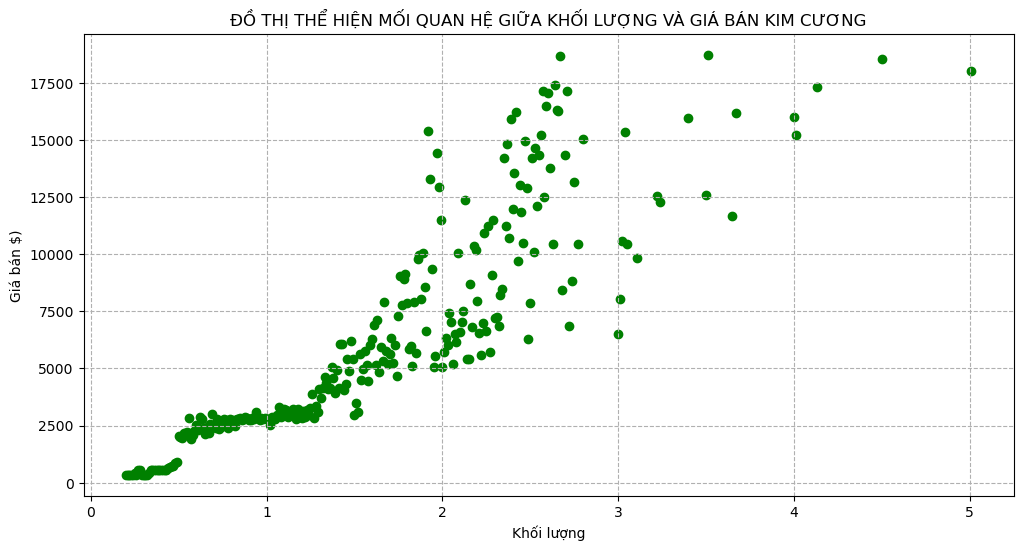

In [55]:
#Trực quan hóa dữ liệu diện tích với giá bán nhà (price):
plt.figure(figsize=(12,6))
plt.scatter(df['carat'],
            df['price'],
            marker='o', 
            color='green')
plt.title('ĐỒ THỊ THỂ HIỆN MỐI QUAN HỆ GIỮA KHỐI LƯỢNG VÀ GIÁ BÁN KIM CƯƠNG')
plt.xlabel('Khối lượng')
plt.ylabel('Giá bán $)')
plt.grid(ls='--')
plt.show()

In [56]:
#Tách các biến độc lập để xây dựng mô hình hồi quy
X_area = df['carat'].values

#Tách biến phụ thuộc:
y_price = df['price'].values

#------------Biến đổi X về dạng ma trận-------
X_area = X_area.reshape(-1,1)


#Hiển thị 10 bộ tham số đầu tiên:
print('Khối lượng:', X_area[:5,0])
print('Giá bán  :', y_price[:5])

Khối lượng: [0.21 0.23 0.29 0.31 0.24]
Giá bán  : [326 326 334 335 336]


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_area, 
                                                    y_price, 
                                                    test_size=0.15,
                                                    shuffle=True)

print("1. Kích thước tập Training:", len(y_train))
print("2. Kích thước tập Test    :" ,len(y_test))

1. Kích thước tập Training: 232
2. Kích thước tập Test    : 41


In [88]:
X_train[:10]

array([[1.  ],
       [1.41],
       [1.78],
       [2.44],
       [3.51],
       [0.68],
       [1.98],
       [1.84],
       [1.44],
       [0.74]])

In [89]:
y_train[:10]

array([ 2795,  4145,  8889, 13027, 18701,  2554, 12923,  7922,  4064,
        2418], dtype=int64)

In [95]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression

#khai báo sử dụng model với các tham số mặc định
model_linear_carat = LinearRegression()

#Các tham số của mô hình:
model_linear_carat.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [96]:
#Huấn luyện model:
model_linear_carat.fit(X_train, y_train)

LinearRegression()

In [97]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w1 = model_linear_carat.coef_
print('Hệ số: w1= ', w1)

Hệ số: w1=  [4692.0521613]


In [98]:
#Hệ số w0 (bias):
w0 = model_linear_carat.intercept_
print('Hệ số: w0= ', w0)

Hệ số: w0=  -1275.0412959691594


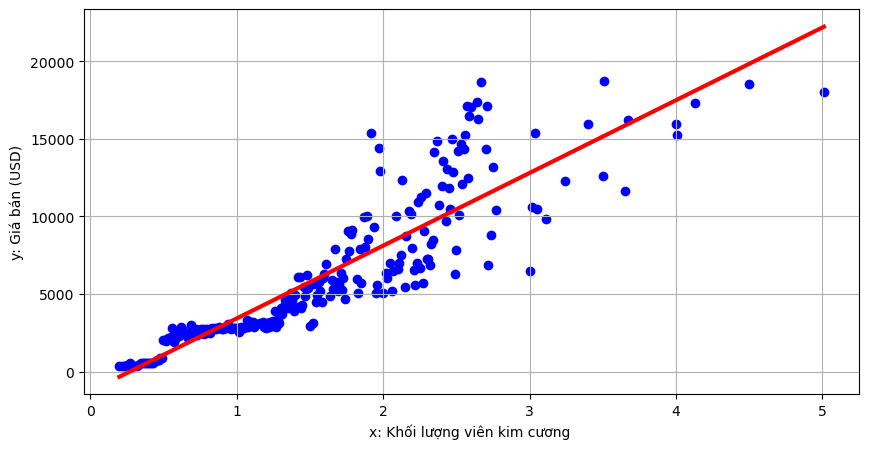

In [99]:
#Trực quan hóa đường hồi quy tuyến tính
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)

plt.figure(figsize=(10,5))
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,model_linear_carat.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Giá bán (USD)")
plt.xlabel("x: Khối lượng viên kim cương ")
plt.grid()
plt.show()

In [100]:
#Kiểm tra trên tập Test:
y_pred1 =model_linear1.predict(X_test)

#Làm tròn và chuyển về số nguyên
y_pred1 = np.round(y_pred1,0).astype(int)

print('Kết quả trên tập Test:',y_pred1.ravel())

Kết quả trên tập Test: [1721 2020 1703  205 2072  608 1858 1780  291 1592 2277  180  984 2294
 1549  967 2397 2234 1395 1002 2251 1652 1746 1635 1832  505  556  240
  719 1293  265 2756 2046  223 2577  377  907  830 1387  813 1541]


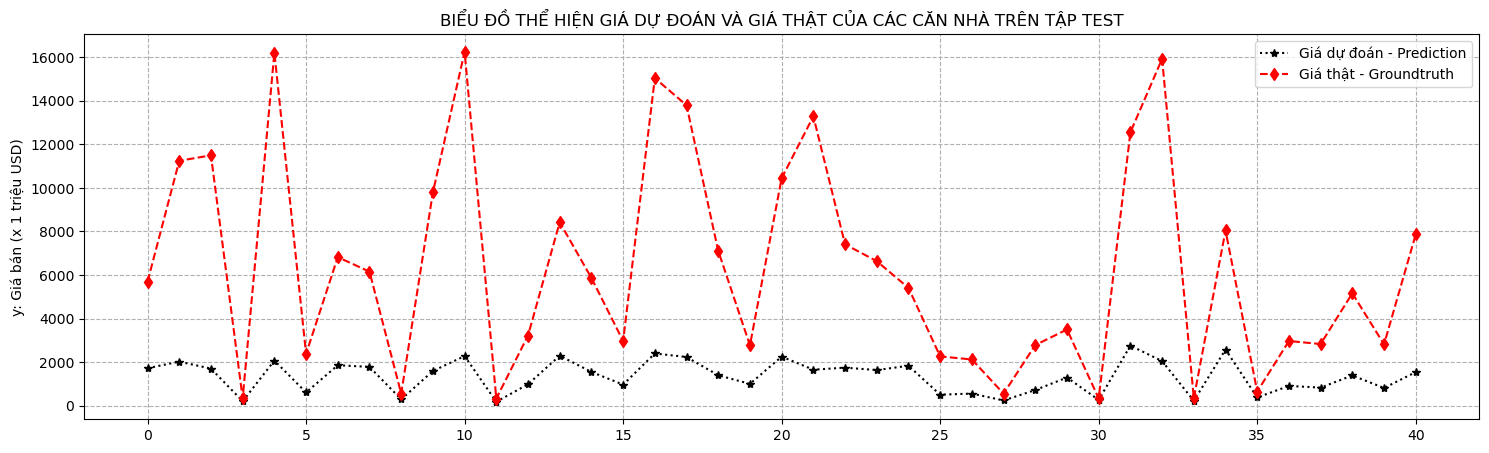

In [101]:
#Trực quan hóa kết quả
plt.figure(figsize=(18,5))
plt.plot(y_pred1, marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test, marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.grid(ls='--')
plt.legend()
plt.show()